In [46]:
from IPython.display import YouTubeVideo

# 1. Welcome to Computer Vision

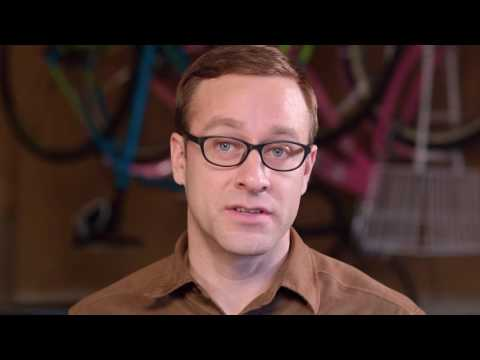

In [47]:
YouTubeVideo('fODI-1r28rM', width=960, height=540)

# 2. Overview

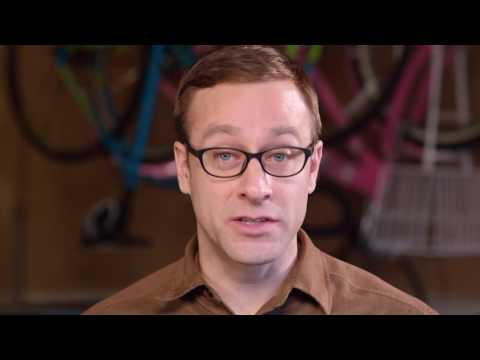

In [48]:
YouTubeVideo('yN7u0qmJDhA', width=960, height=540)

# 3. Getting Started, Camera Calibration

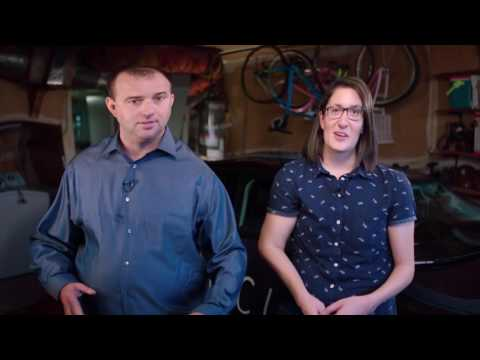

In [49]:
YouTubeVideo('0zlyx5nL8Uo', width=960, height=540)

# 4. Distortion Correction

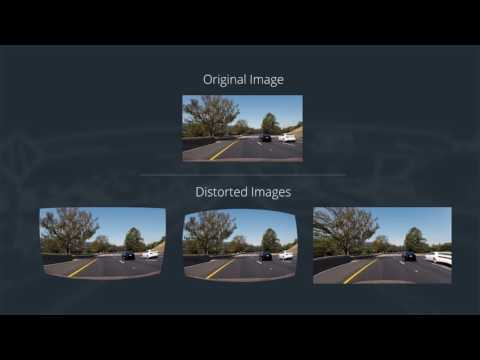

In [50]:
YouTubeVideo('Bv3o0INBQIU', width=960, height=540)

## Distortion
### Distortion

Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image; this transformation isn’t perfect. Distortion actually changes what the shape and size of these 3D objects appear to be. So, the first step in analyzing camera images, is to undo this distortion so that you can get correct and useful information out of them.

# 5. Quiz: Effects of Distortion

## QUIZ QUESTION

Why is it important to correct for image distortion?

- (A) Distortion can change the apparent size of an object in an image.
- (B) Distortion can change the apprent shape of an object in an image.
- (C) Distortion can cause an object's appearance to change depending on where it is in the field of view.
- (D) Distortion can make objects appear closer or farther away than they actually are.

Answer: All. Distortion can change all kinds of things about the appearance of objects in images.

# 6. Pinhole Camera Model

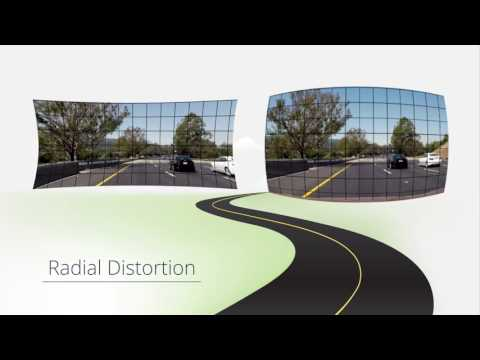

In [51]:
YouTubeVideo('FBHyHUN-A8c', width=960, height=540)

## Types of Distortion

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called **radial distortion**, and it’s the most common type of distortion.

Another type of distortion, is **tangential distortion**. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.

## Distortion Coefficients and Correction

There are three coefficients needed to correct for **radial distortion: k1, k2**, and **k3**. To correct the appearance of radially distorted points in an image, one can use a correction formula.

In the following equations, $(x,y)$ is a point in a distorted image. To undistort these points, OpenCV calculates r, which is the known distance between a point in an undistorted (corrected) image $(x_{corrected}, y_{corrected})$ and the center of the image distortion, which is often the center of that image $(x_{c}, y_{c})$. This center point $(x_{
c}, y_{c})$ is sometimes referred to as the distortion center. These points are pictured below.

Note: The distortion coefficient k3 is required to accurately reflect major radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, k3 has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: [k1, k2, p1, p2, k3]. In this course, we will use it in all calibration calculations so that our calculations apply to a wider variety of lenses (wider, like wide angle, haha) and can correct for both minor and major radial distortion.

<img src="img/screen-shot-2016-12-01-at-3.10.19-pm.png">
<center>Points in a distorted and undistorted (corrected) image. The point (x, y) is a single point in a distorted image and (x_corrected, y_corrected) is where that point will appear in the undistorted (corrected) image.</center>

<img src="img/screen-shot-2016-11-23-at-6.05.49-pm.png" width=400>
<center>Radial distortion correction.</center>

There are two more coefficients that account for tangential distortion: p1 and p2, and this distortion can be corrected using a different correction formula.

<img src="img/screen-shot-2016-11-23-at-6.10.06-pm.png" width=400>
<center>Tangential distortion correction.</center>

# 7. Quiz: Image Formation

## QUIZ QUESTION

Fun fact: the "pinhole camera" is not just a model, but was actually the earliest means of projecting images, [first documented almost 2500 years ago in China!](https://en.wikipedia.org/wiki/Camera_obscura)

Now back to computer vision... what is the fundamental difference between images formed with a pinhole camera and those formed using lenses?

- (A) Images formed by a pinhole camera are always flipped upside down, lensed images appear upright.
- (B) Pinhole camera images are black and while, while lenses form color images.
- (C) Pinhole camera images are free from distortion, but lenses tend to introduce image distortion.
- (D) Images formed by pinhole cameras are the same as those formed using lenses.

Answer: C: And our cameras all have lenses, so we need to correct for image distortion.

# 8. Measuring Distortion

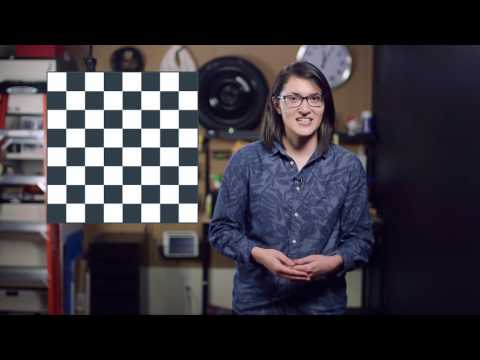

In [52]:
YouTubeVideo('q3B71N6FrGw', width=960, height=540)

# 9. Finding Corners

## Finding Corners
In this exercise, you'll use the OpenCV functions findChessboardCorners() and drawChessboardCorners() to automatically find and draw corners in an image of a chessboard pattern.

To learn more about both of those functions, you can have a look at the OpenCV documentation here: [cv2.findChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [cv2.drawChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners).

Applying these two functions to a sample image, you'll get a result like this:

<img src="img/corners-found3.jpg">

In the following exercise, your job is simple. Count the number of corners in any given row and enter that value in nx. Similarly, count the number of corners in a given column and store that in ny. Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.

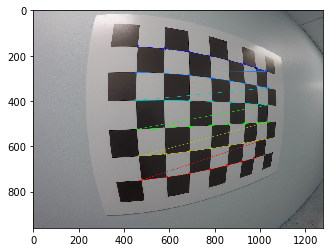

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# Make a list of calibration images
#fname = 'calibration_test.png'
fname = 'GOPR0032.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.show()


# 10. Calibrating Your Camera

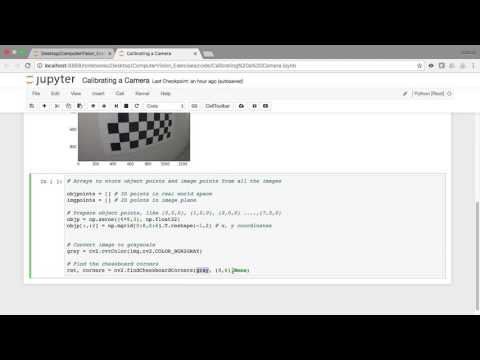

In [53]:
YouTubeVideo('lA-I22LtvD4', width=960, height=540)

## Note Regarding Corner Coordinates
Since the origin corner is (0,0,0) the final corner is (6,4,0) relative to this corner rather than (7,5,0).

### Examples of Useful Code

Converting an image, imported by cv2 or the glob API, to grayscale:

```
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
```

Note: If you are reading in an image using mpimg.imread() this will read in an RGB image and you should convert to grayscale using cv2.COLOR_RGB2GRAY, but if you are using cv2.imread() or the glob API, as happens in this video example, this will read in a BGR image and you should convert to grayscale using cv2.COLOR_BGR2GRAY. We'll learn more about color conversions later on in this lesson, but please keep this in mind as you write your own code and look at code examples.

Finding chessboard corners (for an 8x6 board):

```
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
```

Drawing detected corners on an image:

```
img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
```

Camera calibration, given object points, image points, and the shape of the grayscale image:

```
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
```

Undistorting a test image:

```
dst = cv2.undistort(img, mtx, dist, None, mtx)
```

## A note on image shape
The shape of the image, which is passed into the **calibrateCamera** function, is just the height and width of the image. One way to retrieve these values is by retrieving them from the **grayscale image shape** array gray.shape[::-1]. This returns the image width and height in pixel values like (1280, 960).

Another way to retrieve the image shape, is to get them directly from the color image by retrieving the first two values in the color image shape array using img.shape[1::-1]. This code snippet asks for just the first two values in the shape array, and reverses them. Note that in our case we are working with a greyscale image, so we only have 2 dimensions (color images have three, height, width, and depth), so this is not necessary.

It's important to use an entire grayscale image shape or the first two values of a color image shape. This is because the entire shape of a color image will include a third value -- the number of color channels -- in addition to the height and width of the image. For example the shape array of a color image might be (960, 1280, 3), which are the pixel height and width of an image (960, 1280) and a third value (3) that represents the three color channels in the color image which you'll learn more about later, and if you try to pass these three values into the calibrateCamera function, you'll get an error.

# 11. Correcting for Distortion

## Correcting for Distortion

<img src="img/orig-and-undist.png">

Here, you'll get a chance to try camera calibration and distortion correction for yourself!

There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions cv2.calibrateCamera() and cv2.undistort() to compute the calibration and undistortion.

Unfortunately, we can't perform the extraction of object points and image points in the browser quiz editor, so we provide these for you in the quiz below.

Try computing the calibration and undistortion in the exercise below, and if you want to play with extracting object points and image points yourself, fork the Jupyter notebook and images in [this repository](https://github.com/udacity/CarND-Camera-Calibration).

If you run into any errors as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up!

In [16]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )

objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    #undist = np.copy(img)  # Delete this line
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

KeyError: 'objpoints'

## Challenge: Calibrate your own camera!
If you're up for a challenge, go ahead and try these steps on your own camera images. Just print out a [chessboard pattern](http://docs.opencv.org/2.4/_downloads/pattern.png), stick it to a flat surface, and take 20 or 30 pictures of it. Make sure to take pictures of the pattern over the entire field of view of your camera, particularly near the edges.

To extract object points and image points you can check out the Jupyter notebook in [this repository](https://github.com/udacity/CarND-Camera-Calibration). If you're following along with the code in the notebook, be sure you set the right size for your chessboard, the link above is to a 9 x 6 pattern, while before we were using an 8 x 6.

# 12. Lane Curvature

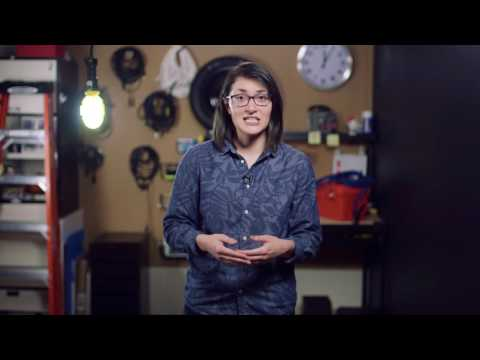

In [54]:
YouTubeVideo('2UQ22uRybuU', width=960, height=540)

## Lane Curvature
### Calculating Lane Curvature

Self-driving cars need to be told the correct steering angle to turn, left or right. You can calculate this angle if you know a few things about the speed and dynamics of the car and how much the lane is curving.

One way to calculate the curvature of a lane line, is to fit a 2nd degree polynomial to that line, and from this you can easily extract useful information.

For a lane line that is close to vertical, you can fit a line using this formula: **f(y) = Ay^2 + By + C**, where A, B, and C are coefficients.

A gives you the curvature of the lane line, B gives you the heading or direction that the line is pointing, and C gives you the position of the line based on how far away it is from the very left of an image (y = 0).


# 13. Perspective Transform

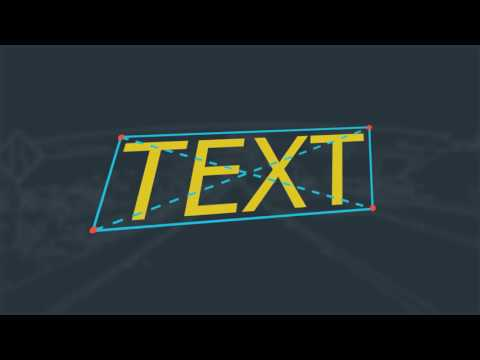

In [55]:
YouTubeVideo('JTesiOANhB0', width=960, height=540)

## Perspective Transform
### Perspective transform

A perspective transform maps the points in a given image to different, desired, image points with a new perspective. The perspective transform you’ll be most interested in is a bird’s-eye view transform that let’s us view a lane from above; this will be useful for calculating the lane curvature later on. Aside from creating a bird’s eye view representation of an image, a perspective transform can also be used for all kinds of different view points.

# 14. Quiz: Curvature and Perspective

## QUIZ QUESTION

There are various reasons you might want to perform a perspective transform on an image, but in the case of road images taken from our front-facing camera on a car, why are we interested in doing a perspective transform?

- (A) Because it is more straightforward to take a gradient on a top-down view of the road image.
- (B) Because ultimately we want to measure the curvature of the lines, and to do that, we need to transform to a top-down view.
- (C) Because transforming the perspective removes the effect of curvature from our measurement.
- (D) Because transforming the perspective removes the effect of shadows and color differences from our road image.

Answer: B. We want to measure the curvature of the lane, and to do that we first need to transform to a top-down view of the lane

# 15. Transform a Stop Sign

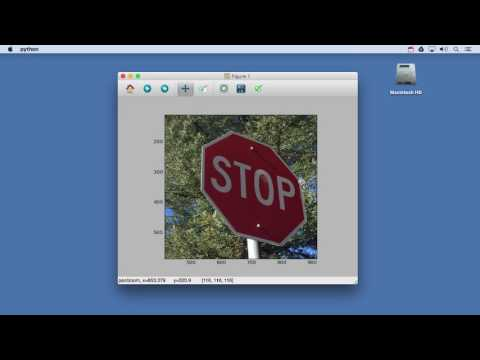

In [56]:
YouTubeVideo('OXILkkXXY8A', width=960, height=540)

## Examples of Useful Code

Compute the perspective transform, M, given source and destination points:

```
M = cv2.getPerspectiveTransform(src, dst)
```

Compute the inverse perspective transform:

```
Minv = cv2.getPerspectiveTransform(dst, src)
```

Warp an image using the perspective transform, M:
```
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
```

Note: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

# 16. Intuitions

## QUIZ QUESTION

Here's a matching challenge to test your intuition about camera calibration, distortion, and perspective transforms. Drag the answers to the appropriate location in the column on the right.

Process / Purpose

- Camera Calibration : To compute the transformation between 3D object points in the world and 2D image points.
- Distortion Correction: To ensure that the geometrical shape of objects is represented consistently, no matter where they appear in an image.
- Perspective Transformation: To transform an image such that we are effectively viewing objects from a different angle or direction.

# 17. Undistort and Transform

## Undistort and Transform Perspective

<img src="img/undist-and-warp.png">

Here's a tricky quiz for you! You have now seen how to find corners, calibrate your camera, undistort an image, and apply a perspective transform. Now it's your chance to perform all these steps on an image. In the last quiz you calibrated the camera, so here I'm giving you the camera matrix, mtx, and the distortion coefficients dist to start with.

Your goal is to generate output like the image shown above. To do that, you need to write a function that takes your distorted image as input and completes the following steps:

- Undistort the image using cv2.undistort() with mtx and dist
- Convert to grayscale
- Find the chessboard corners
- Draw corners
- Define 4 source points (the outer 4 corners detected in the chessboard pattern)
- Define 4 destination points (must be listed in the same order as src points!)
- Use cv2.getPerspectiveTransform() to get M, the transform matrix
- use cv2.warpPerspective() to apply M and warp your image to a top-down view

HINT: Source points are the x and y pixel values of any four corners on your chessboard, you can extract these from the corners array output from cv2.findChessboardCorners(). Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.

If you run into any errors as you run your code, please refer to the Examples of Useful Code section in the previous video and make sure that your code syntax matches up! For this example, please also refer back to the examples in the Calibrating Your Camera video.

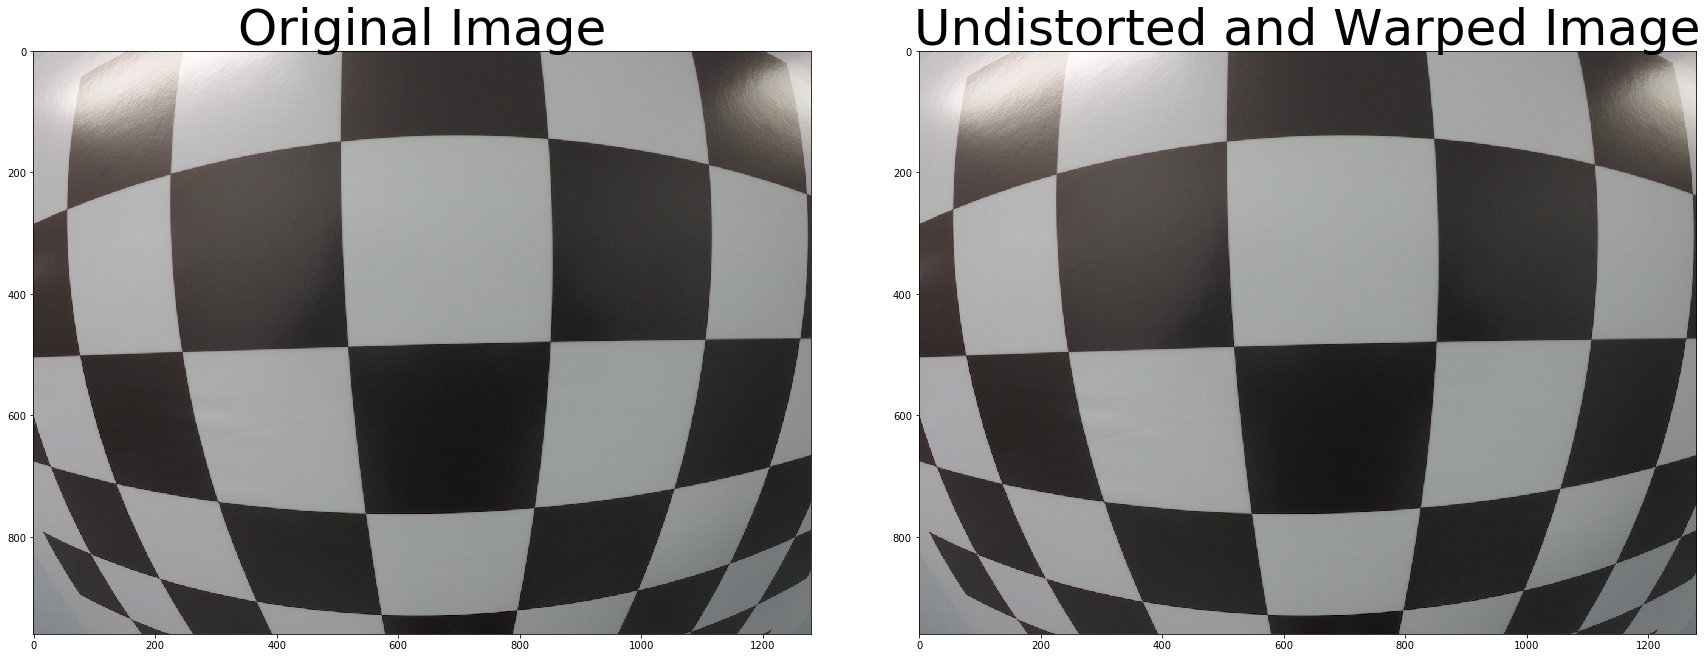

In [20]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    M = None
    warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

# 18. How I Did It

## Solution to Undistort and Transform quiz:
That was a tricky quiz!

Let's take a closer look at the pieces involved. These steps will all be useful when you get to the project at the end of this section.

First off, we defined a function for you, corners_unwarp(). The function accepts an image and our previously calculated values for the camera matrix, mtx, and distortion coefficients, dist.

Then you had to implement the function.

Here's how I implemented mine:

```python
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M
```

## Output
Here's the output you needed to achieve:

<img src="img/undist-and-warp.png">

# 19. Gradient Threshold

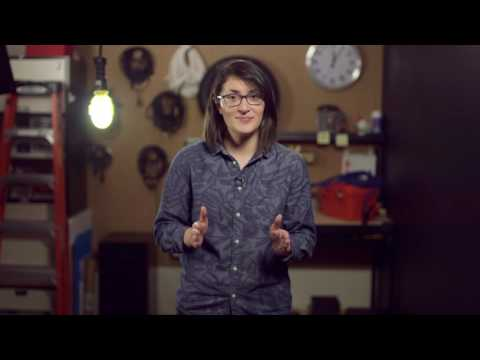

In [57]:
YouTubeVideo('2TlORF3RzH8', width=960, height=540)

# 20. Sobel Operator

## Sobel Operator
The Sobel operator is at the heart of the Canny edge detection algorithm you used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the x or y direction. The operators for $Sobel_{x}$ and $Sobel_{y}$, respectively, look like this:

<img src="img/soble-operator.png" width=400>

These are examples of Sobel operators with a kernel size of 3 (implying a 3 x 3 operator in each case). This is the minimum size, but the kernel size can be any odd number. A larger kernel implies taking the gradient over a larger region of the image, or, in other words, a smoother gradient.

To understand how these operators take the derivative, you can think of overlaying either one on a 3 x 3 region of an image. If the image is flat across that region, then the result (summing the element-wise product of the operator and corresponding image pixels) will be zero. If, instead, for example, you apply the S
​x
​​  operator to a region of the image where values are rising from left to right, then the result will be positive, implying a positive derivative.

## Derivative Example
If we apply the Sobel x and y operators to this image:

<img src="img/curved-lane.jpg" width=600>

And then we take the absolute value, we get the result:

<img src="img/screen-shot-2016-12-01-at-4.50.36-pm.png">
<center>Absolute value of Sobel x (left) and Sobel y (right).</center>

## $x$ vs. $y$

In the above images, you can see that the gradients taken in both the x and the y directions detect the lane lines and pick up other edges. Taking the gradient in the x direction emphasizes edges closer to vertical. Alternatively, taking the gradient in the y direction emphasizes edges closer to horizontal.

In the upcoming exercises, you'll write functions to take various thresholds of the x and y gradients. Here's some code that might be useful:

### Examples of Useful Code

You need to pass a single color channel to the cv2.Sobel() function, so first convert it to grayscale:

```
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
```

Note: Make sure you use the correct grayscale conversion depending on how you've read in your images. Use cv2.COLOR_RGB2GRAY if you've read in an image using mpimg.imread(). Use cv2.COLOR_BGR2GRAY if you've read in an image using cv2.imread().

Calculate the derivative in the x direction (the 1, 0 at the end denotes x direction):

```
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
```

Calculate the derivative in the y direction (the 0, 1 at the end denotes y direction):

```
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
```

Calculate the absolute value of the x derivative:

```
abs_sobelx = np.absolute(sobelx)
```

Convert the absolute value image to 8-bit:

```
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
```

Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png. You could just as well choose a different standard range of values, like 0 to 1 etc.

Create a binary threshold to select pixels based on gradient strength:

```python
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')
```

## Result

<img src="img/sobelx-binary.jpg" width=600>
<center>Pixels have a value of 1 or 0 based on the strength of the x gradient.</center>

# 21. Applying Sobel

## Applying Sobel
Here's your chance to write a function that will be useful for the Advanced Lane-Finding Project at the end of this lesson! Your goal in this exercise is to identify pixels where the gradient of an image falls within a specified threshold range.

### Example

<img src="img/thresh-x-example.png">

Here's the scaffolding for your function:

```python
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    # Apply cv2.Sobel()
    # Take the absolute value of the output from cv2.Sobel()
    # Scale the result to an 8-bit range (0-255)
    # Apply lower and upper thresholds
    # Create binary_output
    return binary_output
```

Pass in img and set the parameter orient as 'x' or 'y' to take either the x or y gradient. Set min_thresh, and max_thresh to specify the range to select for binary output. You can use exclusive (<, >) or inclusive (<=, >=) thresholding.

NOTE: Your output should be an array of the same size as the input image. The output array elements should be 1 where gradients were in the threshold range, and 0 everywhere else.

As usual, if you run into any errors as you run your code, please refer to the Examples of Useful Code section in the previous video and make sure that your code syntax matches up!

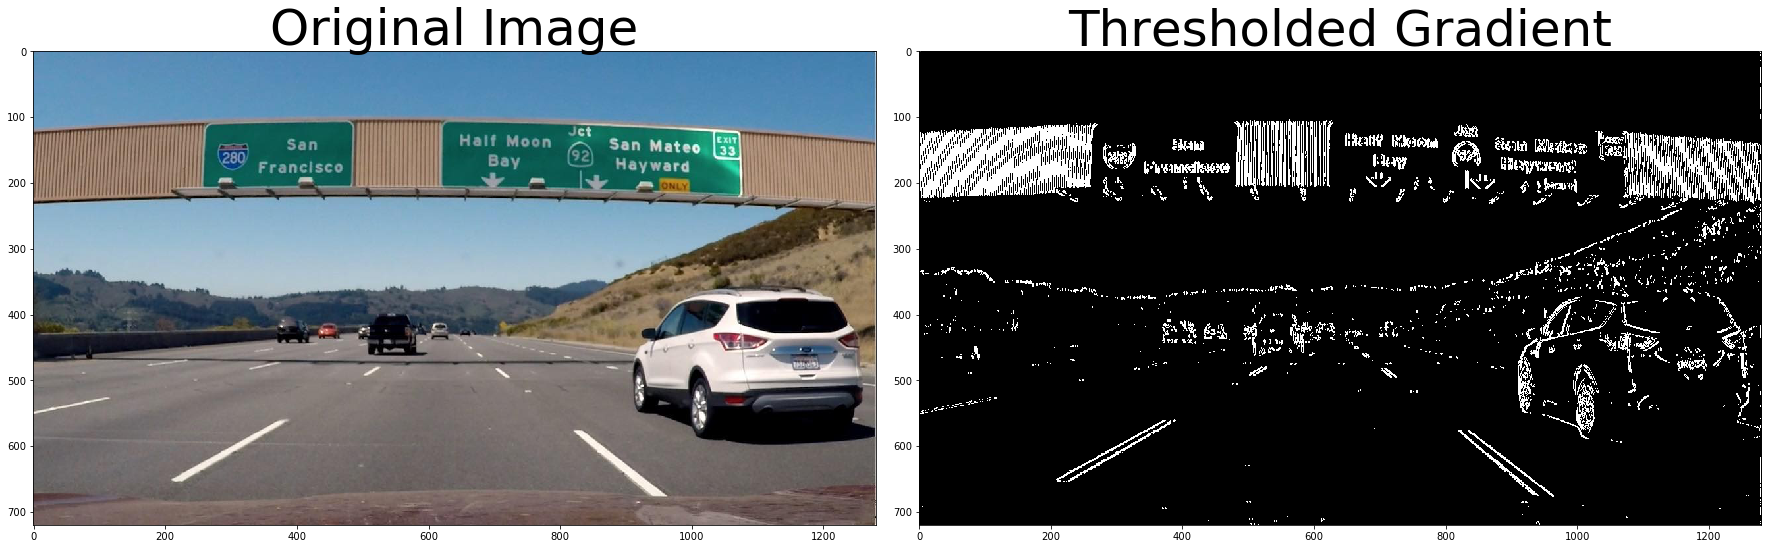

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

# 22. Magnitude of the Gradient

## Magnitude of the Gradient

<img src="img/mag-binary.jpg" width=600>

With the result of the last quiz, you can now take the gradient in x or y and set thresholds to identify pixels within a certain gradient range. If you play around with the thresholds a bit, you'll find the x-gradient does a cleaner job of picking up the lane lines, but you can see the lines in the y-gradient as well.

In this next exercise, your goal is to apply a threshold to the overall magnitude of the gradient, in both x and y.

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the x and y directions, the magnitude is the square root of the sum of the squares.

$abs\_sobelx=\sqrt{(sobel_{x})^2}$

$abs\_sobely=\sqrt{(sobel_{y})^2}$

$abs\_sobelxy=\sqrt{(sobel_{x})^2 + (sobel_{y})^2}$


It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter (must be an odd number!)

The function you'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met.

## Steps to take in this exercise:
1. Fill out the function in the editor below to return a thresholded gradient magnitude. Again, you can apply exclusive (<, >) or inclusive (<=, >=) thresholds.
2. Test that your function returns output similar to the example below for sobel_kernel=9, mag_thresh=(30, 100).

## Here's an example of the output you're going for:

<img src="img/thresh-mag-example.png">

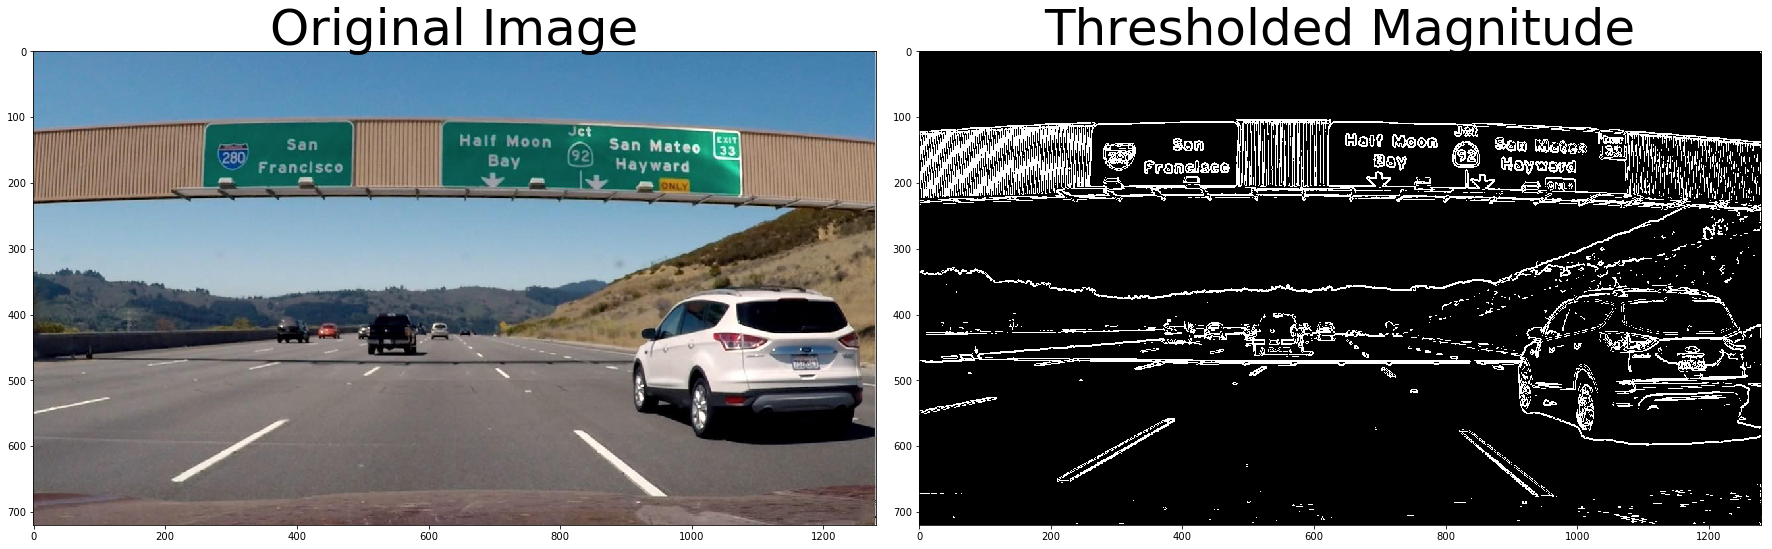

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

# 23. Direction of the Gradient

## Direction of the Gradient
When you play around with the thresholding for the gradient magnitude in the previous exercise, you find what you might expect, namely, that it picks up the lane lines well, but with a lot of other stuff detected too. Gradient magnitude is at the heart of Canny edge detection, and is why Canny works well for picking up all edges.

In the case of lane lines, we're interested only in edges of a particular orientation. So now we will explore the direction, or orientation, of the gradient.

The direction of the gradient is simply the inverse tangent (arctangent) of the y gradient divided by the x gradient:

$arctan(sobel_{y}/sobel_{x})$.

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of −π/2 to π/2. An orientation of 0 implies a horizontal line and orientations of +/− π/2 imply vertical lines.

In this next exercise, you'll write a function to compute the direction of the gradient and apply a threshold. The direction of the gradient is much noisier than the gradient magnitude, but you should find that you can pick out particular features by orientation.

## Steps to take in this exercise:
1. Fill out the function in the editor below to return a thresholded absolute value of the gradient direction. Use Boolean operators, again with exclusive (<, >) or inclusive (<=, >=) thresholds.
2. Test that your function returns output similar to the example below for sobel_kernel=15, thresh=(0.7, 1.3).

<img src="img/thresh-grad-dir-example.jpg">

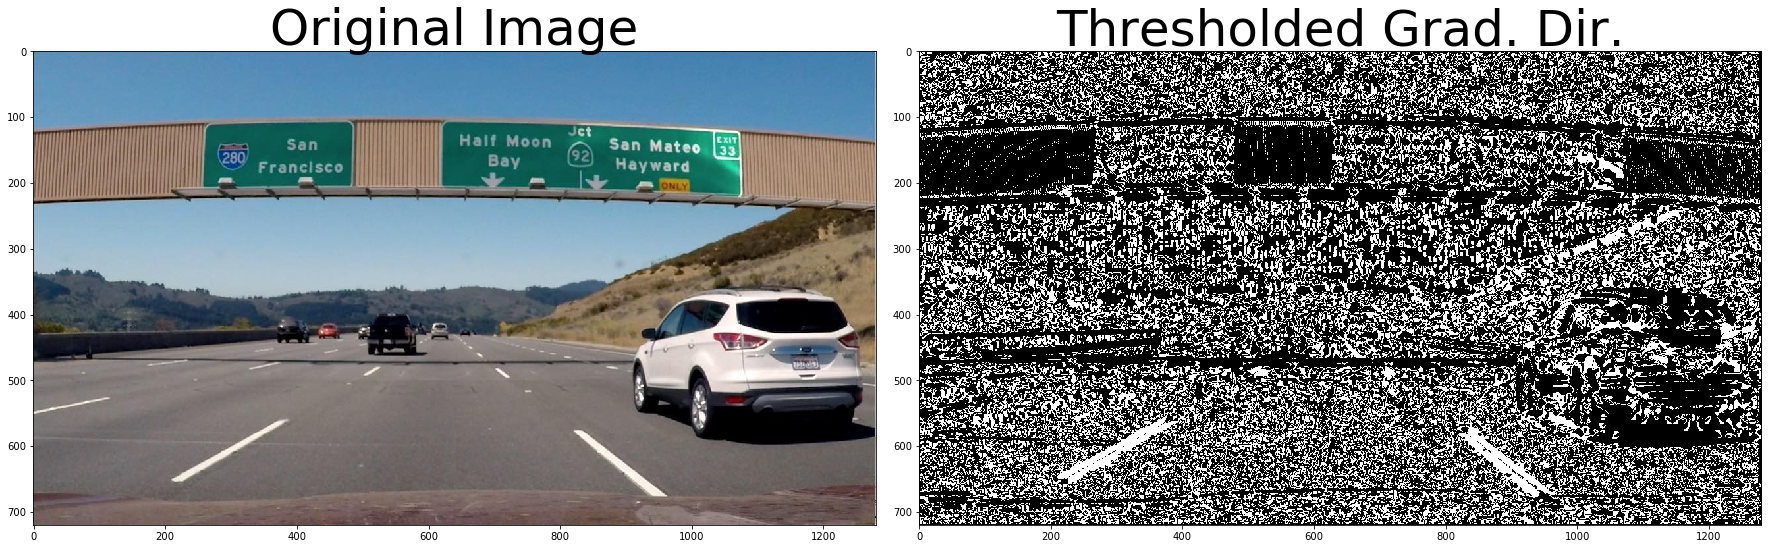

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# 24. Combining Thresholds

## Combining Thresholds
If you play around with the thresholds in the last exercise, you'll find that you can start to identify the lane lines by gradient direction alone by setting the threshold around thresh = (0.7, 1.3), but there's still a lot of noise in the resulting image.

Now consider how you can use various aspects of your gradient measurements (x, y, magnitude, direction) to isolate lane-line pixels. Specifically, think about how you can use thresholds of the x and y gradients, the overall gradient magnitude, and the gradient direction to focus on pixels that are likely to be part of the lane lines.

## Challenge:
In the project at the end of this section, you'll want to experiment with thresholding various aspects of the gradient, so now would be a great time to start coding it up on your local machine! Grab the image we've been working with for the last three quizzes [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.png) (or a smaller jpg file [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.jpg)).

Combine the selection thresholds from the last 3 quizzes to write a piece of code like the following, where you can play with various thresholds and see the output.

```python
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))
```

Try different combinations and see what you get.

For example, here is a selection for pixels where both the x and y gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.

```python
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
```

## Output
Here is an example of a binary result from multiple thresholds:

<img src="img/binary-combo-example.jpg" width=600>

# 25. Color Spaces

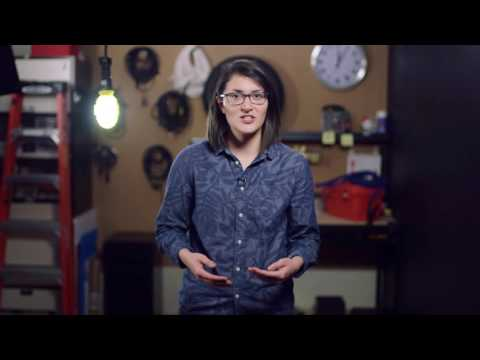

In [58]:
YouTubeVideo('mhILAhzgPRE', width=960, height=540)

# 26. Color Thresholding

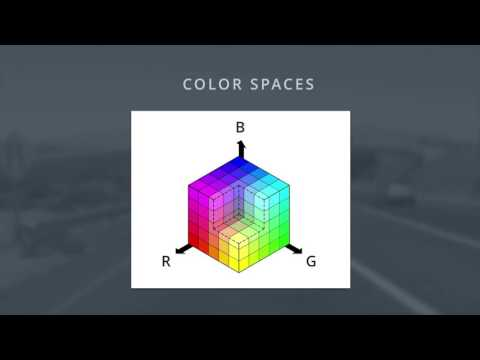

In [59]:
YouTubeVideo('dMI_so4P1Jc', width=960, height=540)

A **color space** is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

**RGB** is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

Note: If you read in an image using matplotlib.image.imread() you will get an RGB image, but if you read it in using OpenCV cv2.imread() this will give you a BGR image.

<img src="img/screen-shot-2016-11-22-at-4.35.48-pm.png" width=400>
<center>RGB color space</center>

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.

There is also **HSV** color space (hue, saturation, and value), and **HLS** space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis.

To get some intuition about these color spaces, you can generally think of Hue as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, **Lightness** and **Value** represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. Saturation also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the history and the derivation of HLS and HSV color spaces [here](https://en.wikipedia.org/wiki/HSL_and_HSV).

<img src="img/screen-shot-2016-11-22-at-4.44.32-pm.png" width=600>
<center>(Left) HSV color space, (Right) HLS color space</center>

In the code example, I used HLS space to help detect lane lines of different colors and under different lighting conditions.

OpenCV provides a function hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS) that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that all this math is for converting 8-bit images, which is the format for most road images in this course. These equations convert one color at a time from RGB to HLS.

### Constants

$V_{max} \leftarrow max(R, G, B)$

$V_{min} \leftarrow min(R ,G, B)$

These are the maximum and minimum values across all three RGB values for a given color.

### H channel conversion equations

There are three different equations, which one is used depends on the the value of $V_{max}$ whether that's R, G, or B.

$H \leftarrow \frac{30(G - B)}{V_{max}−V_{min}}, if V_{max} = R$

$H \leftarrow 60 + \frac{30(B - R)}{V_{max}−V_{min}}, if V_{max} = G$

$H \leftarrow 120 + \frac{30(R - G)}{V_{max}−V_{min}}, if V_{max} = B$


Note: In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

### L channel conversion equation

$L \leftarrow \frac{V_{max}+V_{min}}{2}


### S channel conversion equations

There are two possible equations; one is used depending on the value of L.

$S \leftarrow \frac{V_{max}-V_{min}}{V_{max}+V_{min}} if L < 0.5$

$S \leftarrow \frac{V_{max}-V_{min}}{2 - (V_{max}+V_{min})} if L \ge 0.5$


# 27. HLS intuitions

<img src="img/screen-shot-2016-12-06-at-6.26.30-pm.png" width=600>

## QUESTION 1 OF 2

Considering the colors pictured above, in HLS color space, which of these options will have the lowest L value?

Answer: A. L stands for Lightness and it's a measure of how light or dark a color is. Of these three colors, all of them have the same value for hue and saturation, but the darkest color (option A) has the lowest value for lightness, and the lightest option (option C) has the highest value for lightness.

<img src="img/screen-shot-2016-12-06-at-6.26.30-pm.png" width=600>

## QUESTION 2 OF 2

Considering the same three images, in which of the HLS color channels will these three images have approximately the same value? (H, L, or S)

Answer: H: They are all bluish, so will have very similar Hue (H-channel) values.


# 28. HLS and Color Thresholds

## HLS and Color Thresholds

<img src="img/test6.jpg" width=600>

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:

```python
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
```

And here's the result:

<img src="img/test6gray.jpg">

You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:

```
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
```

<img src="img/test6rgb.jpg">

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:

```
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
```

<img src="img/test6r-channel.jpg">

In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

```
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
```

<img src="img/test6hls.jpg">

The S channel picks up the lines well, so let's try applying a threshold there:

```
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
```

<img src="img/test6s-channel.jpg">

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

```
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1
```

<img src="img/test6h-channel.jpg">

From these examples, you can see that the S channel is probably your best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image:

<img src="img/test4.jpg" width=600>

Here's how the various channels and binaries (with the same threshold values as above) look:

<img src="img/test4gray.jpg">

<img src="img/test4r-channel.jpg">

<img src="img/test4s-channel.jpg">

<img src="img/test4h-channel.jpg">


Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.
NEXT

# 29. HLS Quiz

<img src="img/hls-binary.jpg" width=600>

In this exercise, you can try applying a color threshold in the HLS color space. If you have any problems with the implementation, please refer to the previous video and instructor notes.

Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive (>) lower bound and an inclusive upper bound (<=).


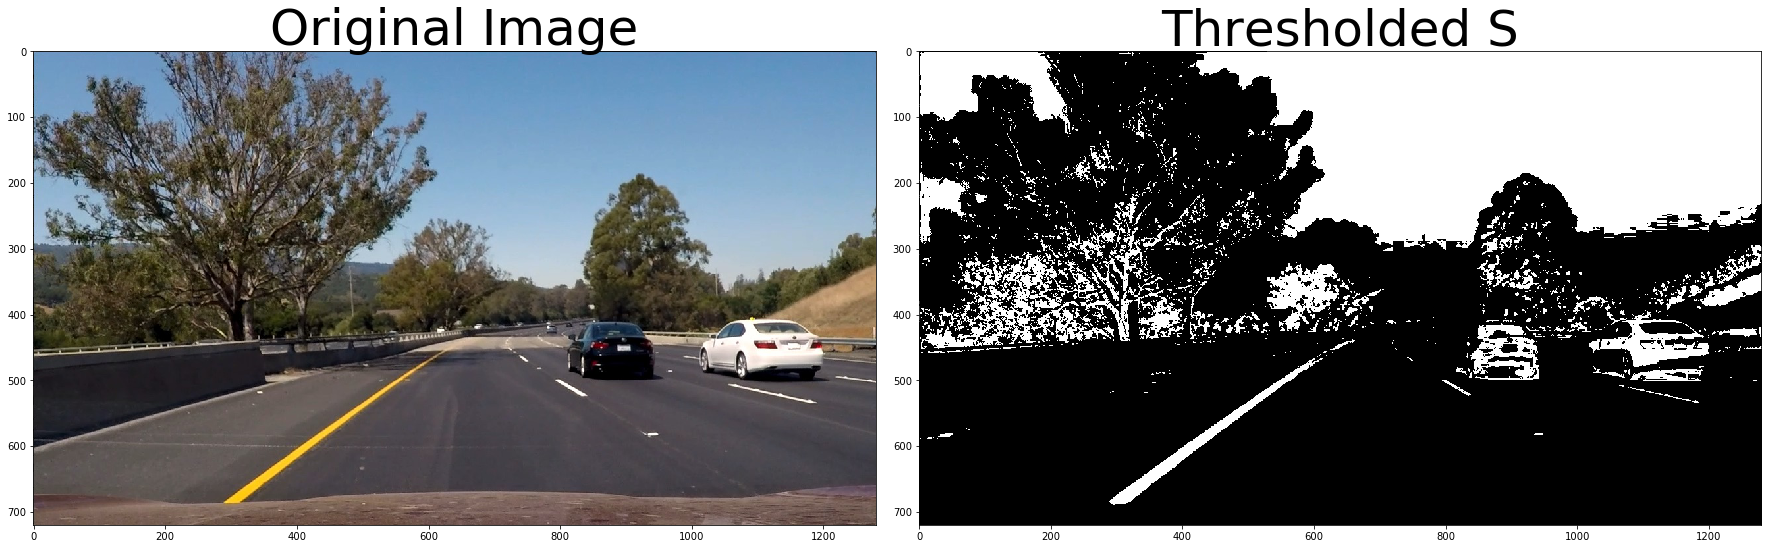

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# 30. Color and Gradient

## Color and Gradient
Now it's time to combine what you know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:

<img src="img/screen-shot-2016-12-06-at-5.19.16-pm.png">
<center>Combined color and gradient thresholds for lane detection.</center>

At this point, it's okay to detect edges around trees or cars because these lines can be mostly filtered out by applying a mask to the image and essentially cropping out the area outside of the lane lines. It's most important that you reliably detect different colors of lane lines under varying degrees of daylight and shadow.

You can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. You can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

Here's what that looks like in code:

```python
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
```

The output is shown below. The final image color_binary is a combination of binary thresholding the S channel (HLS) and binary thresholding the result of applying the Sobel operator in the x direction on the original image.

<img src="img/screen-shot-2016-12-06-at-5.27.35-pm.png">
<center>(Left) Stacked image; the green is the gradient threshold component and the blue is the color channel threshold component. (Right) black and white combined thresholded image - this one has combined both gradient and color thresholds into one image.</center>

In this next exercise, you'll get the chance to play around with different combinations of color and gradient with the goal using the pipeline you come up with for your upcoming project. There's no correct submission, just explore!

Some interesting things to explore might include: the H channel, different threshold values for color and gradient binary images, and even a different color space, like HSV!

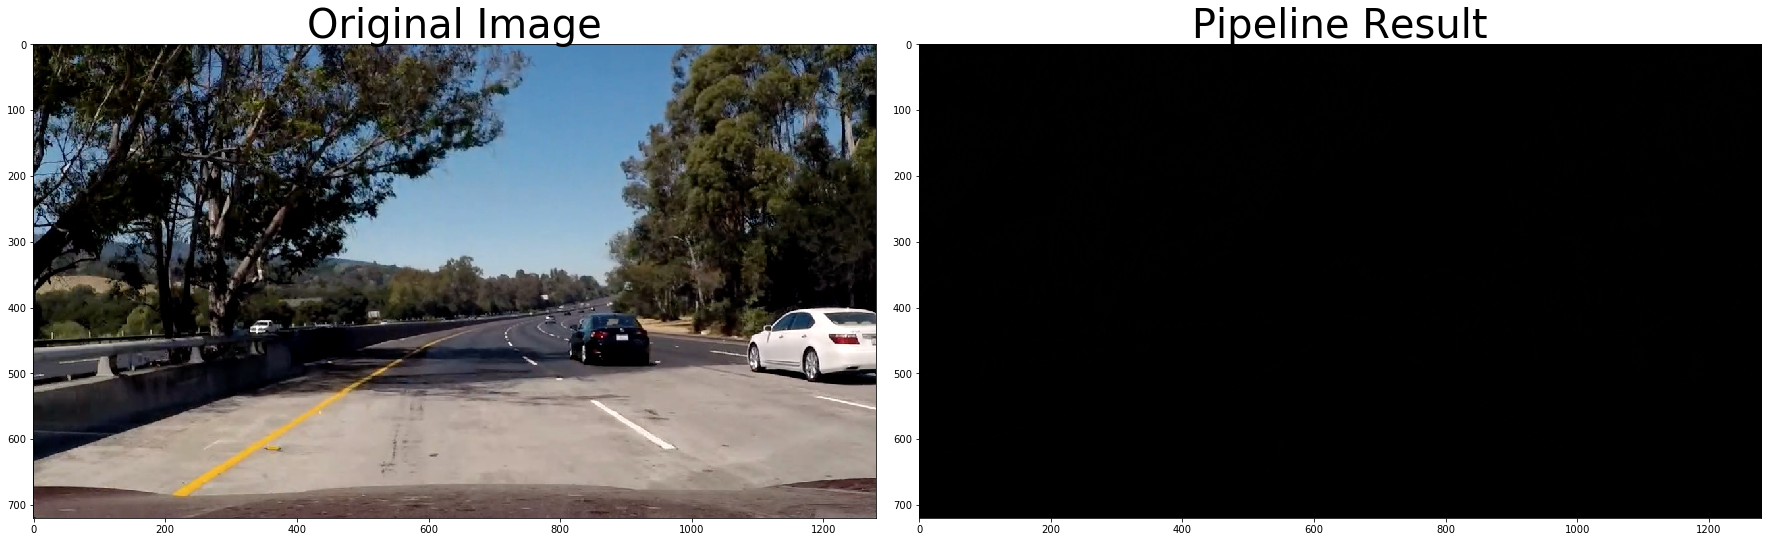

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


image = mpimg.imread('test5.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# 31. Reviewing Steps

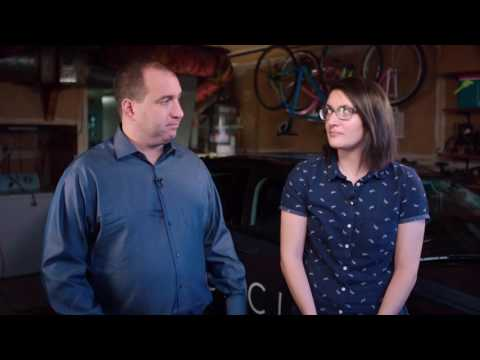

In [39]:
YouTubeVideo('0lyUMJdg-PY', width=720, height=400)

## Project Steps
### Project Steps

Steps we’ve covered so far:

1. Camera calibration
2. Distortion correction
3. Color/gradient threshold
4. Perspective transform

After doing these steps, you’ll be given two additional steps for the project:

1. Detect lane lines
2. Determine the lane curvature

# 32. Processing Each Image

## Processing Each Image

<img src="img/color-shadow-example.jpg" width=600>

In the project at the end of this module, the first thing you'll do is to compute the camera calibration matrix and distortion coefficients. You only need to compute these once, and then you'll apply them to undistort each new frame. Next, you'll apply thresholds to create a binary image and then apply a perspective transform.

### Thresholding
You'll want to try out various combinations of color and gradient thresholds to generate a binary image where the lane lines are clearly visible. There's more than one way to achieve a good result, but for example, given the image above, the output you're going for should look something like this:

<img src="img/binary-combo-img.jpg" width=600>

### Perspective Transform
Next, you want to identify four source points for your perspective transform. In this case, you can assume the road is a flat plane. This isn't strictly true, but it can serve as an approximation for this project. You would like to pick four points in a trapezoidal shape (similar to region masking) that would represent a rectangle when looking down on the road from above.

The easiest way to do this is to investigate an image where the lane lines are straight, and find four points lying along the lines that, after perspective transform, make the lines look straight and vertical from a bird's eye view perspective.

### Here's an example of the result you are going for with straight lane lines:

<img src="img/warped-straight-lines.jpg">

### Now for curved lines
Those same four source points will now work to transform any image (again, under the assumption that the road is flat and the camera perspective hasn't changed). When applying the transform to new images, the test of whether or not you got the transform correct, is that the lane lines should appear parallel in the warped images, whether they are straight or curved.

Here's an example of applying a perspective transform to your thresholded binary image, using the same source and destination points as above, showing that the curved lines are (more or less) parallel in the transformed image:

<img src="img/warped-curved-lines.jpg">

# 33. Finding the Lines

## Locate the Lane Lines and Fit a Polynomial

<img src="img/warped-example.jpg" width=600>
<center>Thresholded and perspective transformed image</center>

You now have a thresholded warped image and you're ready to map out the lane lines! There are many ways you could go about this, but here's one example of how you might do it:

### Line Finding Method: Peaks in a Histogram

After applying calibration, thresholding, and a perspective transform to a road image, you should have a binary image where the lane lines stand out clearly. However, you still need to decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line.

I first take a histogram along all the columns in the lower half of the image like this:

```python
import numpy as np
histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
plt.plot(histogram)
```

The result looks like this:

<img src="img/screen-shot-2017-01-28-at-11.21.09-am.png">

### Sliding Window
With this histogram I am adding up the pixel values along each column in the image. In my thresholded binary image, pixels are either 0 or 1, so the two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines. I can use that as a starting point for where to search for the lines. From that point, I can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame.

Here is a short animation showing this method:


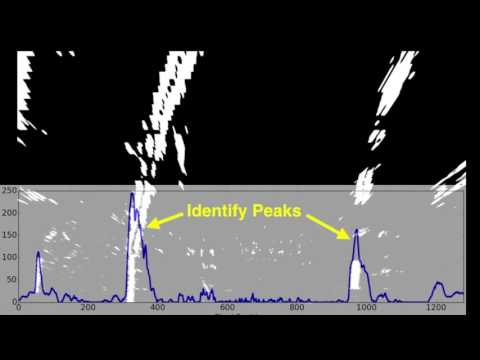

In [40]:
YouTubeVideo('siAMDK8C_x8', width=720, height=400)

### Implement Sliding Windows and Fit a Polynomial
Suppose you've got a warped binary image called binary_warped and you want to find which "hot" pixels are associated with the lane lines. Here's a basic implementation of the method shown in the animation above. You should think about how you could improve this implementation to make sure you can find the lines as robustly as possible!

```python
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
```

### Visualization
At this point, you're done! But here is how you can visualize the result as well:

```python
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
```

The output should look something like this:

<img src="img/screen-shot-2017-01-28-at-11.49.20-am.png" width=600>

### Skip the sliding windows step once you know where the lines are
Now you know where the lines are you have a fit! In the next frame of video you don't need to do a blind search again, but instead you can just search in a margin around the previous line position like this:

```python
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
left_fit[1]*nonzeroy + left_fit[2] + margin))) 

right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
And you're done! But let's visualize the result here as well
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
```

### And the output should look something like this:

<img src="img/screen-shot-2017-01-28-at-12.39.43-pm.png" width=600>

The green shaded area shows where we searched for the lines this time. So, once you know where the lines are in one frame of video, you can do a highly targeted search for them in the next frame. This is equivalent to using a customized region of interest for each frame of video, and should help you track the lanes through sharp curves and tricky conditions. If you lose track of the lines, go back to your sliding windows search or other method to rediscover them.

# 34. Sliding Window Search

Another way to approach the sliding window method is to apply a convolution, which will maximize the number of "hot" pixels in each window. A convolution is the summation of the product of two separate signals, in our case the window template and the vertical slice of the pixel image.

You slide your window template across the image from left to right and any overlapping values are summed together, creating the convolved signal. The peak of the convolved signal is where there was the highest overlap of pixels and the most likely position for the lane marker.

Now let's try using convolutions to find the best window center positions in a thresholded road image. The code below allows you to experiment with using convolutions for a sliding window search function. Go ahead and give it a try.

<img src="img/window-result2.png" width=600>

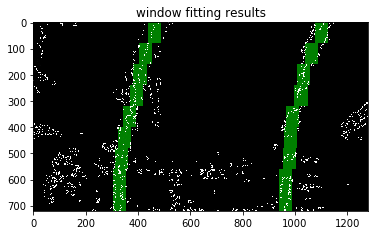

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
%matplotlib inline

# Read in a thresholded image
warped = mpimg.imread('warped_example.jpg')
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(image[int(3*image.shape[0]/4):,:int(image.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(image[int(3*image.shape[0]/4):,int(image.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(image.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,image.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,image.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage= np.dstack((warped, warped, warped))*255 # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()


# 35. Measuring Curvature

## Measuring Curvature
You're getting very close to a final result! You have a thresholded image, where you've estimated which pixels belong to the left and right lane lines (shown in red and blue, respectively, below), and you've fit a polynomial to those pixel positions. Next we'll compute the radius of curvature of the fit.

<img src="img/color-fit-lines.jpg" width=600>
<center>Here I have fit the left and right lines with a second order polynomial shown in green.</center>

In the last exercise, you located the lane line pixels, used their x and y pixel positions to fit a second order polynomial curve:

$f(y)=Ay^2 + By + C$

You're fitting for $f(y)$, rather than $f(x)$, because the lane lines in the warped image are near vertical and may have the same x value for more than one y value.

## Radius of Curvature
The radius of curvature (awesome tutorial here) at any point x of the function x=f(y) is given as follows:

$R_{curve} = \frac{[1 + (\frac{dx}{dy})^2]^{3/2}}{\lvert\frac{d^2x}{dy^2}\rvert}$

In the case of the second order polynomial above, the first and second derivatives are:

$f′(y)= \frac{dy}{dx} = 2Ay + B$

$f′′(y)= \frac{d^2x}{dy^2} = 2A$

So, our equation for radius of curvature becomes:

$R_{curve} = \frac{(1+(2Ay+B)^2)^{3/2}}{\lvert2A\rvert}$

The y values of your image increase from top to bottom, so if, for example, you wanted to measure the radius of curvature closest to your vehicle, you could evaluate the formula above at the y value corresponding to the bottom of your image, or in Python, at yvalue = image.shape[0].

## Sample Implementation

```python
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
```

The output looks like this:

<img src="img/screen-shot-2017-01-27-at-9.47.14-am.png" width=600>

Now we have polynomial fits and we can calculate the radius of curvature as follows:

```python
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48
```

But now we need to stop and think... We've calculated the radius of curvature based on pixel values, so the radius we are reporting is in pixel space, which is not the same as real world space. So we actually need to repeat this calculation after converting our x and y values to real world space.

This involves measuring how long and wide the section of lane is that we're projecting in our warped image. We could do this in detail by measuring out the physical lane in the field of view of the camera, but for this project, you can assume that if you're projecting a section of lane similar to the images above, the lane is about 30 meters long and 3.7 meters wide. Or, if you prefer to derive a conversion from pixel space to world space in your own images, compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, and the dashed lane lines are 10 feet or 3 meters long each.

So here's a way to repeat the calculation of radius of curvature after correcting for scale in x and y:

```python
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m
```

Check out the [U.S. government specifications for highway curvature](http://onlinemanuals.txdot.gov/txdotmanuals/rdw/horizontal_alignment.htm#BGBHGEGC) to see how your numbers compare. There's no need to worry about absolute accuracy in this case, but your results should be "order of magnitude" correct.

# 36. Tips and Tricks for the Project

In this lesson, you've acquired some new tools to help you find and track the lane lines. By all means, you are welcome and encouraged to use the techniques you used in the very first project. Here are some tips for the upcoming project.

## Camera Calibration
The calibration images in the lesson exercise were taken with a different camera setting and a different chessboard pattern than the calibration images for the project. **You need to set your chessboard size to 9x6 for the project** instead of 8x6 as in the lesson.

## Do your curvature values make sense?
We're not expecting anything like perfection for this project, but a good check on whether or not your perspective transform worked as expected, your conversion from pixel space to world space was correct, and that you successfully calculated the radius of curvature is whether or not your results are roughly consistent with reality.

Here is an image from Google maps of where the project video was made (just northwest of the Udacity office!). Here, I've drawn a circle to coincide with the first left curve in the project video. This is a very rough estimate, but as you can see, the radius of that circle is approximately 1 km. You don't need to tune your algorithm to report exactly a radius of 1 km in the project, but if you're reporting 10 km or 0.1 km, you know there might be something wrong with your calculations!

<img src="img/screen-shot-2017-01-28-at-5.06.11-pm.png" width=600>

Here are some other tips and tricks for building a robust pipeline:

## Offset
You can assume the camera is mounted at the center of the car, such that the lane center is the midpoint at the bottom of the image between the two lines you've detected. The offset of the lane center from the center of the image (converted from pixels to meters) is your distance from the center of the lane.

## Tracking
After you've tuned your pipeline on test images, you'll run on a video stream, just like in the first project. In this case, however, you're going to keep track of things like where your last several detections of the lane lines were and what the curvature was, so you can properly treat new detections. To do this, it's useful to define a Line() class to keep track of all the interesting parameters you measure from frame to frame. Here's an example:

```python
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
```

You can create an instance of the Line() class for the left and right lane lines to keep track of recent detections and to perform sanity checks.

## Sanity Check
Ok, so your algorithm found some lines. Before moving on, you should check that the detection makes sense. To confirm that your detected lane lines are real, you might consider:

- Checking that they have similar curvature
- Checking that they are separated by approximately the right distance horizontally
- Checking that they are roughly parallel

## Look-Ahead Filter
Once you've found the lane lines in one frame of video, and you are reasonably confident they are actually the lines you are looking for, you don't need to search blindly in the next frame. You can simply search within a window around the previous detection.

For example, if you fit a polynomial, then for each y position, you have an x position that represents the lane center from the last frame. Search for the new line within +/- some margin around the old line center.

Double check the bottom of the page here to remind yourself how this works.

Then check that your new line detections makes sense (i.e. expected curvature, separation, and slope).

## Reset
If your sanity checks reveal that the lane lines you've detected are problematic for some reason, you can simply assume it was a bad or difficult frame of video, retain the previous positions from the frame prior and step to the next frame to search again. If you lose the lines for several frames in a row, you should probably start searching from scratch using a histogram and sliding window, or another method, to re-establish your measurement.

## Smoothing
Even when everything is working, your line detections will jump around from frame to frame a bit and it can be preferable to smooth over the last n frames of video to obtain a cleaner result. Each time you get a new high-confidence measurement, you can append it to the list of recent measurements and then take an average over n past measurements to obtain the lane position you want to draw onto the image.

## Drawing
Once you have a good measurement of the line positions in warped space, it's time to project your measurement back down onto the road! Let's suppose, as in the previous example, you have a warped binary image called warped, and you have fit the lines with a polynomial and have arrays called ploty, left_fitx and right_fitx, which represent the x and y pixel values of the lines. You can then project those lines onto the original image as follows:

```python
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)
```


<img src="img/lane-drawn.jpg" width=600>
<center>Original (undistorted) image with lane area drawn</center>

# 37. Onward to the Project!

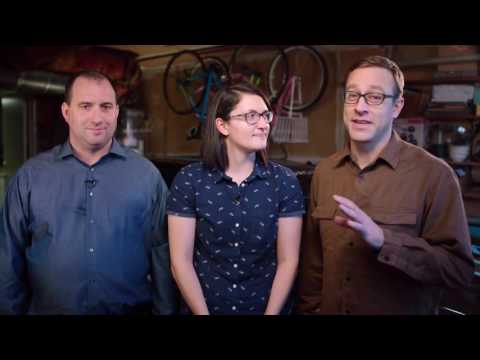

In [45]:
YouTubeVideo('oYHg46OYpsM', width=720, height=400)

# 38. Project: Advanced Lane Finding

## Project Submission

### The Goal of this Project
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in [the project repository](https://github.com/udacity/CarND-Advanced-Lane-Lines).

### The Writeup
The writeup will be the primary output you submit (along with your code of course).

Within the project repository, there is a writeup template that you can use as a starting point for your project writeup.

A great writeup should include the rubric points as well as your description of how you addressed each point. You should include a detailed description of the code used in each step (with line-number references and code snippets where appropriate) and links to other supporting documents or external references. You should also include images in your writeup to illustrate how your code works.

All that said, please be concise! We're not looking for you to write a book, just a brief description of how you passed each rubric point, and references to the relevant code :)

You are not required to use Markdown for your writeup. If you use another method, please just submit a PDF of your writeup.

### The Code
Your code should stand on its own as readable material. Explain in code comments, as well as in your writeup, how your code works and why you wrote it that way.

Make it easy for a reviewer to understand your code.

You are more than welcome to use code from the lesson. But if you copy something explain how it works and why you used it.

### What It Takes to Pass
Read the project rubric for details on the requirements for a passing submission.

Your writeup should include each rubric point and your description of how you addressed that point in your submission. The project repo provides an example template for your writeup.

There is no starter code provided, but you are welcome to use code from the lesson and quizzes as you like. You may complete the project in a Jupyter notebook, but it's not required. Feel free to build it as a standalone project.

To help the reviewer evaluate your project, please save example images from each stage of your pipeline to the output_images folder and provide in your writeup a description of each image. Please also save your output video and include it with your submission.

### Evaluation
Once you have completed your project, double check the Project Rubric to make sure you have addressed all the rubric points. Your project will be evaluated by a Udacity reviewer according to that same rubric.

Your project must "meet specifications" in each category in order for your submission to pass. If you are happy with your submission, then you are ready to submit! If you see room for improvement in any category in which you do not meet specifications, keep working!

### Submission
#### What to Include
Include a zipped file with your:

1. writeup
2. code (or a Jupyter notebook)
3. example output images
4. output video

Alternatively, you may submit a link to your GitHub repo for the project.

In either case, remember to include example images for each stage of your pipeline and your final output video in your submission.

#### Ready to Submit?
Click on the "Submit Project" button and follow the instructions!

#### Using GitHub and Creating Effective READMEs
If you are unfamiliar with GitHub , Udacity has a brief GitHub tutorial to get you started. Udacity also provides a more detailed free course on git and GitHub.

To learn about REAMDE files and Markdown, Udacity provides a free course on READMEs, as well.

GitHub also provides a tutorial about creating Markdown files.